<div id="toc"></div>

Может быть, вы видели, как в споре на околомедицинские темы собеседники обмениваются ссылками на Пабмед, не всегда ознакомившись хотя бы с абстрактами исследований. Забавно, что обычно такой подход себя оправдывает, ведь мало кто станет утруждать себя поиском и чтением полного текста публикаций; одно только наличие ссылки на некую работу может поколебать уверенность оппонента в своей правоте. Но, как вы понимаете, сама по себе ссылка на исследование не является полноценным аргументом; всегда стоит обратить внимание на то, как были собраны и обработаны данные. Для этого не нужно профессионально разбираться в статистике, достаточно знать основы. Кроме того, эти основы пригодятся, если вы соберетесь публиковать собственное исследование. <br>
Сразу скажем, что весьма полезно (хотя и не обязательно) уметь использовать специальные инструменты для работы с данными. Это могут быть как языки программирования (R, Python), так и специальные программы вроде Excel или SPSS.  В этой статье расчеты и построение графиков выполнены на Питоне. Если нажмете на эту кнопку, то увидите версию статьи с кодом:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from  scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);

</script>
<form action="javascript:code_toggle()">\
<input type="submit" value="Показать/скрыть код."></form>''')

### Выборка и генеральная совокупность

Должен ли повар, который варит кашу, съесть всю кастрюлю, чтобы оценить плод своих кулинарных усилий? Вероятно, нет: он может попробовать чуть-чуть, исходя из того простого соображения, что остальная каша в кастрюле похожа на ту, что оказалась в его ложке. В повседневной жизни мы постоянно экстраполируем представление о части на целое. Возможно, вы любите мандарины, но чтобы это понять, вам не пришлось съесть все мандарины на свете. 

Множество объектов, о котором исследователь собирается делать выводы, называется генеральной совокупностью. Например, это могут быть все люди, страдающие диабетом. Или все женщины старше 65, перенесшие инсульт. Или все мандарины на свете. Собрать информацию обо всех объектах обычно невозможно, так что используются выборки. Выборка &mdash; это та часть генеральной совокупности, с которой работает исследователь. Если выборка отражает изучаемые свойства генеральной совокупности, она называется репрезентативной, а если не отражает, то нерепрезентативной (вряд ли пакет гнилых мандаринов убедит вас, что все мандарины на свете плохи на вкус, но не всегда нерепрезентативность выборки так очевидна). 

Эталонный пример работы с нерепрезентативной выборкой &mdash; опрос, проведенный в 1936 году журналом "The Literary Digest": были разосланы бюллетени десяти миллионам человек, среди которых были подписчики журнала и люди, случайным образом выбранные из телефонных справочников и реестров владельцев автомобилей. Два с половиной миллиона человек вернули их заполненными, и большинство из них &mdash; 57% &mdash; в этом опросе поддерживали республиканца Альфа Лэндона. Демократ Франклин Рузвельт набрал 40%, но когда дело дошло до выборов, &mdash; победил. Позже стало понятно, почему так произошло: во-первых, большая часть подписчиков журнала были республиканцами, а во-вторых, телефонами и автомобилями владели более-менее состоятельные люди, которые тоже в основном были республиканцами. 

### Описательная статистика

#### Гистограмма

Первым делом нужно составить представление о выборке и описать ее. Наиболее удобное графическое представление выборки &mdash; гистограмма. Чтобы понять, как устроена гистограмма, возьмем для примера таблицу с данными из знаменитого исследования 1885 года английского ученого Френсиса Гальтона, в котором он изучал взаимосвязь между ростом взрослых людей и ростом их родителей. В таблицу вошли данные о росте детей (то есть уже взрослых людей) и их родителей из 197 семей. Давайте разберемся с ростом детей. 

In [2]:
galton = pd.read_csv('Galton.csv')
galton.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


Посмотрите на графики внизу. Все эти четыре графика &mdash; гистограммы, построенные по выборке Гальтона. По оси  $x$ отложена высота в дюймах, по оси $y$ &mdash; количество людей. Первый график сделан так: мы разбили ось $x$ на два интервала: меньше 67 и больше 67. А потом над каждым интервалом нарисовали прямоугольник, высота которого по оси $y$ соответствует количеству людей с таким ростом. Если бы было одинаковое количество людей с ростом меньше 67 и больше 67, прямоугольники были бы одинаковы. Но слева прямоугольник немного выше, потому что людей ниже 67 дюймов в выборке больше. На втором графике мы разбили ось $x$ уже на 5 интервалов, и над каждым построили прямоугольник соответствующей количеству людей в этом интервале высоты. На третьем рисунке интервалов уже 12, а на 4 &mdash; 40. Вы, наверное, уже поняли, что как недостаточная, так и избыточная точность мешают восприятию гистограммы.

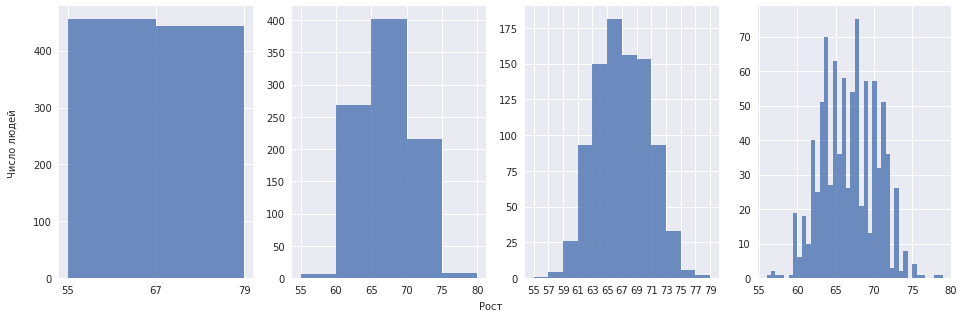

In [3]:
fig = plt.figure(figsize=(16, 5))
fig.text(0.5, 0.04, "Рост", ha='center')
fig.text(0.08, 0.5, "Число людей", va='center', rotation='vertical')
ax = fig.add_subplot(141)
galton.Height.hist(bins=range(55, 81, 12), alpha=0.8)
plt.xticks(range(55, 81, 12))
ax = fig.add_subplot(142)
galton.Height.hist(bins=range(55, 81, 5), alpha=0.8)
plt.xticks(range(55, 81, 5))
ax = fig.add_subplot(143)
galton.Height.hist(bins=range(55, 81, 2), alpha=0.8)
plt.xticks(range(55, 81, 2))
ax = fig.add_subplot(144)
galton.Height.hist(bins=40, alpha=0.8)
plt.show()

Как формально описать это распределение? <br> 
Для начала можно указать на область числовой оси, где единицы наблюдения имеют тенденцию к концентрации. А потом показать, насколько широко и симметрично они рассеиваются в стороны. Для этого используются специальные показатели, которые называются мерами центральной тенденции и мерами рассеяния. <br> 

#### Меры центральной тенденции

Вообще говоря, мер центральной тенденции довольно много, но наиболее часто используются среднее арифметическое, мода и медиана, их мы и разберем. <br> 
Как найти среднее арифметическое для нашей выборки, все знают: $ \frac{1}{n} \sum_{i=1}^{n} x_{i}$ &mdash; сложить рост всех людей и поделить на количество людей. Это прекрасная характеристика выборки, но у нее есть один досадный недостаток: она неустойчива к выбросам.  Если вы забыли, что такое выброс, представьте себе, что когда вы собирали выборку и заполняли таблицу, к одному значению приписали лишний нолик. Или, допустим, вы решили оценить средний месячный доход жителя Сомали, но в число респондентов затесался Билл Гейтс, приехавший туда на выходные. Если выборка небольшая, присутствие необычно выдающихся объектов сильно сместит среднее арифметическое, так что в некоторых случаях от выбросов стоит избавляться (то есть просто исключить из выборки, ничего больше). <br> 
Медиану найти тоже очень просто. Это значение, которое больше одной половины выборки и меньше другой половины выборки. Соответственно, чтобы ее найти, мы выстраиваем все элементы выборки по неубыванию (то есть по возрастанию, а одинаковые значения пусть просто стоят рядом) &mdash; получится вариационный ряд. То, что будет ровно в его центре &mdash; медиана. Например, вот вариационный ряд:<br> $1, 2, 2, 4, 7, 8, 11$ <br>Ровно посередине стоит число 4, оно и будет медианой. Если в вариационном ряду четное число элементов, то медианой будет среднее арифметическое двух чисел, которые стоят посередине. Скажем, в вариационном ряду: <br>$3, 3, 3, 4, 4, 4$ &mdash; медиана равна 3,5. Ничего сложного. Однако если в выборке много единиц наблюдения, быстро найти ее середину бывает проблематично. Порядковый номер медианы в вариационном ряду можно быстро определить вот так: $i_{mdn} = \frac{n+1}{2}$ &mdash; всего-навсего прибавить к числу элементов выборки единицу и поделить на два; для ряда с четным количеством значений результат получится дробным, например 2,5 &mdash; тогда медианой будет среднее арифметическое этих, в данном случае 2-го и 3-го, значений. <br>
Осталась мода. А мода это самое часто встречающееся в выборке значение. Она интересует нас меньше, поскольку обычно является наименее информативным показателем из трех (при работе с непрерывными данными, особенно если значения в выборке довольно точные, &mdash; скажем, пара знаков после запятой, &mdash; часто оказывается, что моды нет вообще или она совершенно непоказательна). 

Если среднее арифметическое и медиана примерно равны, а гистограмма симметрична и напоминает колокол, то такое распределение называют нормальным. Если один бок колокола становится более пологим, чем другой, распределение называют скошенным. На этом рисунке первое распределение &mdash; нормальное, а остальные &mdash; все более скошенные.

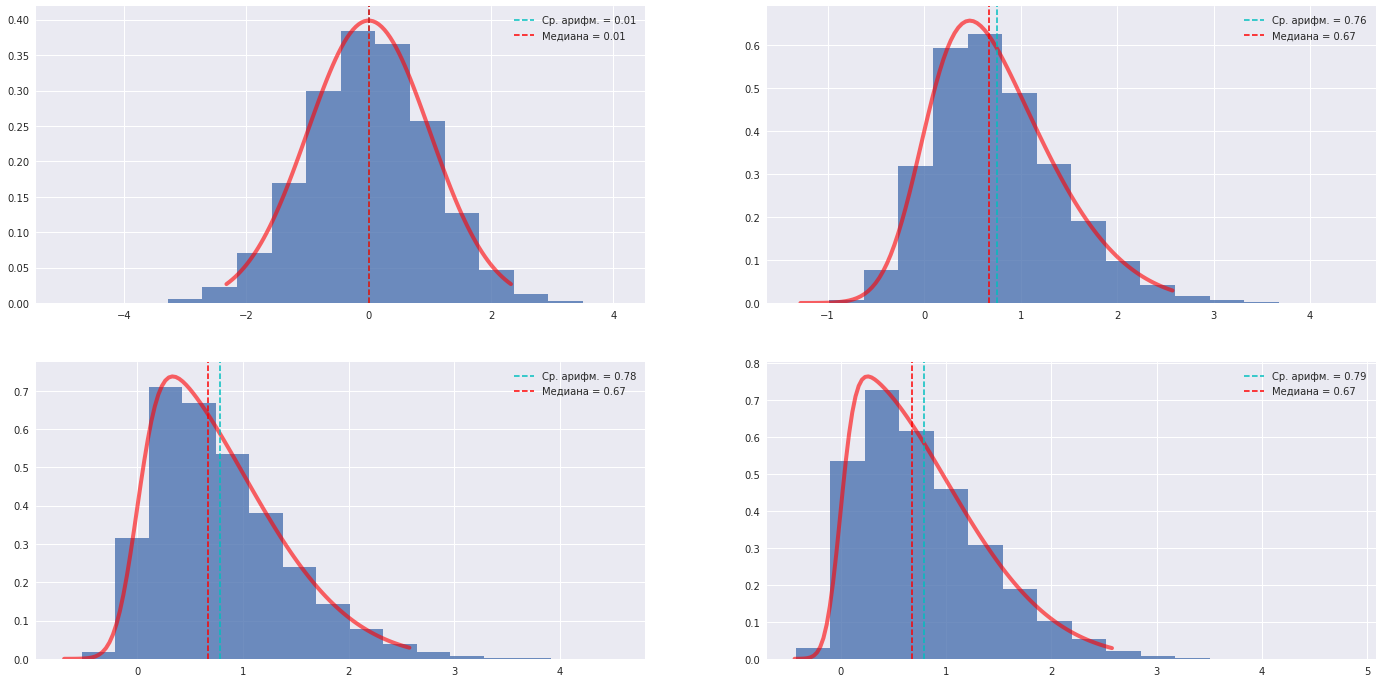

In [4]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(24, 12))
for i in range(0, 4):
    fig.add_subplot(2, 2, i+1)
    sample = stats.skewnorm.rvs(i*3, size=100000)
    x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
    plt.plot(x, stats.skewnorm.pdf(x, i*3), 'r-', lw=4, alpha=0.6)
    plt.hist(sample, 16, normed=True, alpha=0.8)
    line1 = plt.axvline(np.mean(sample), label=('Ср. арифм. = '+str(round(np.mean(sample), 2))), color='c', linestyle='dashed', linewidth=1.5)
    line2 = plt.axvline(np.median(sample), label = ('Медиана = '+str(round(np.median(sample), 2))), color='r', linestyle='dashed', linewidth=1.5)
    plt.legend(handles=[line1, line2])
plt.show()

#### Меры рассеяния

С основными мерами центральной тенденции &mdash; медианой, модой и средним арифметическим &mdash; мы разобрались. Теперь посмотрим на меры рассеяния. Нужны они, повторюсь, затем, чтобы описать, насколько сильно данные рассеяны вдоль оси $x$. Сравните две гистограммы (обратите внимание, что ось $x$ на них имеет одинаковый масштаб):

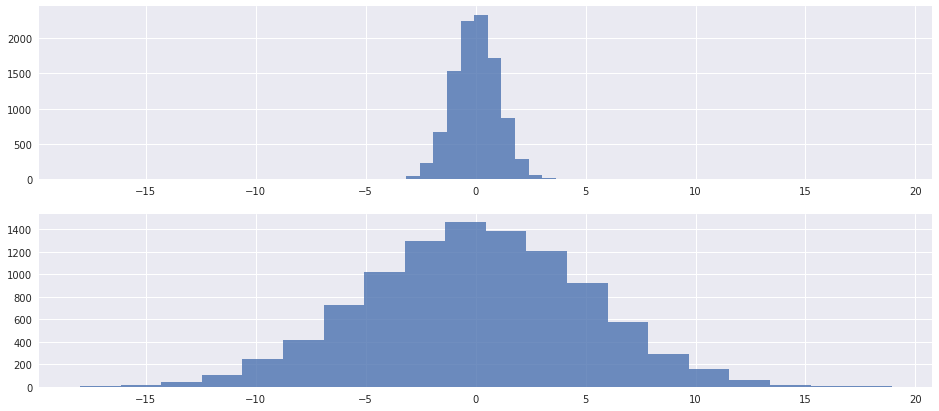

In [5]:
norm_rv1 = stats.norm(loc=0, scale = 1)
norm_rv2 = stats.norm(loc=0, scale = 5)
sample_norm1 = norm_rv1.rvs(size=10000)
sample_norm2 = norm_rv2.rvs(size=10000)
fig = plt.figure(figsize=(16, 7))
ax1 = plt.subplot(211)
plt.hist(sample_norm1, 12, alpha=0.8)
ax2 = plt.subplot(212, sharex=ax1)
plt.hist(sample_norm2, 20, alpha=0.8)
plt.show()

Как видите, в обоих случаях данные распределены вдоль оси $x$ вокруг нуля, но вариабельность значений второй выборки выше. Там, очевидно, есть и объекты со значениями меньше -10 и больше 10, а в первой выборке таких нет вовсе, посмотрите на гистограмму. 

Для описания рассеивания значений в более-менее симметричных колоколообразных распределениях используют среднеквадратическое отклонение, обозначается оно буквой $\sigma$ (сигма). Для первой выборки $\sigma = 1$, а для второй выборки $\sigma = 5$, поэтому вторая гистограмма шире. Чем больше среднеквадратическое отклонение, тем сильнее данные распростираются в стороны от медианы и среднего арифметического. Но не стоит судить об этом показателе по внешнему виду гистограммы. На следующем рисунке две гистограммы одной и той же выборки, просто сделанные с разным масштабом. Обратите внимание на значения на оси $x$.

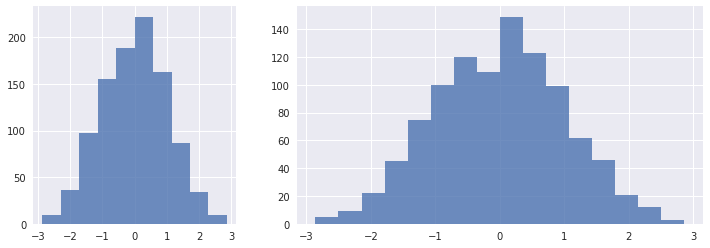

In [6]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 3])
sample_norm = np.random.randn(1000)
ax1 = fig.add_subplot(gs[0])
plt.hist(sample_norm, alpha=0.8)
plt.xticks(range(-3, 4))
ax2 = fig.add_subplot(gs[1])
plt.hist(sample_norm, bins=16, alpha=0.8)
plt.show()

Считается среднеквадратическое отклонение по вот такой формуле: $\sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}}$ &mdash; на первый взгляд довольно пугаюей, но на самом деле очень простой. Смотрите на рисунок:

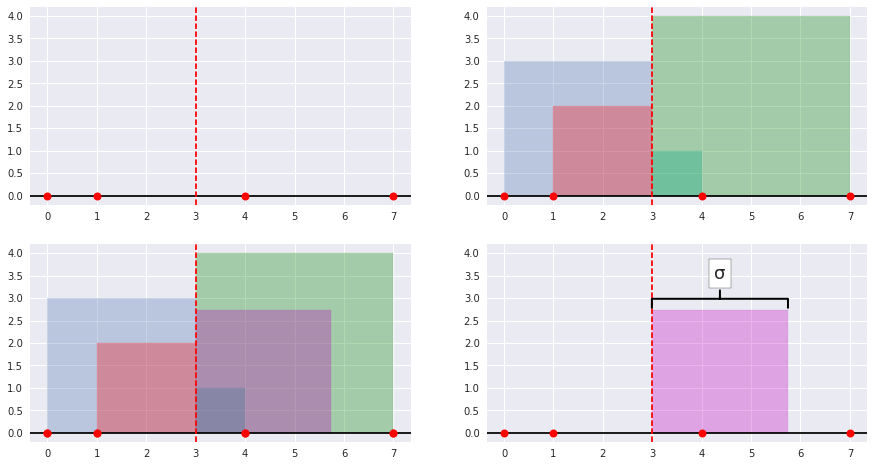

In [7]:
a, b, c, d = 0, 1, 4, 7
mean = (a+b+c+d)/4
alpha=0.3

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(222)
plt.axhline(0., color='k')
plt.axvline(mean, color='r', linestyle='dashed')
ax1.add_patch(
    patches.Rectangle(
        (a, 0.),         # (x,y)
        mean-a,          # ширина
        mean-a,          # высота
    alpha=alpha)
)
ax1.add_patch(patches.Rectangle((b, 0.), mean-b, mean-b, alpha=alpha, color='r'))
ax1.add_patch(patches.Rectangle((mean, 0.), c-mean, c-mean, alpha=alpha, color='c'))
ax1.add_patch(patches.Rectangle((mean, 0.), d-mean, d-mean, alpha=alpha, color='g'))
ax1.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')

ax2 = fig.add_subplot(221, sharey=ax1)
plt.axhline(0., color='k')
plt.axvline(mean, color='r', linestyle='dashed')
plt.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')

ax3 = fig.add_subplot(223)
sigma = np.std(np.array([a, b, c, d]))
plt.axhline(0., color='k')
plt.axvline(mean, color='r', linestyle='dashed')
plt.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')
ax3.add_patch(patches.Rectangle((a, 0.), mean-a, mean-a, alpha=alpha))
ax3.add_patch(patches.Rectangle((b, 0.), mean-b, mean-b, alpha=alpha, color='r'))
ax3.add_patch(patches.Rectangle((mean, 0.), c-mean, c-mean, alpha=alpha, color='c'))
ax3.add_patch(patches.Rectangle((mean, 0.), d-mean, d-mean, alpha=alpha, color='g'))
ax3.add_patch(patches.Rectangle((mean, 0.), sigma, sigma, alpha=alpha, color='m'))
ax3.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')

ax4 = fig.add_subplot(224, sharey=ax3)
plt.axhline(0., color='k')
plt.axvline(mean, color='r', linestyle='dashed')
plt.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')
ax4.add_patch(patches.Rectangle((mean, 0.), sigma, sigma, alpha=alpha, color='m'))
ax4.annotate('σ', xy=((mean+(mean+sigma))/2, sigma+0.2), \
            xytext=((mean+(mean+sigma))/2, sigma+0.6), xycoords='data', 
            fontsize=18, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=3.78, lengthB=0.5', lw=2.0))
plt.show()

Давайте сделаем все буквально по формуле. Возьмем для наглядной иллюстрации выборку из четырех элементов: $0, 1, 4, 7$. Среднее арифметическое этой выборки равно 3. Покажем это на первом графике: на оси $x$ красными точками отмечены элементы нашей выборки, а вертикальная штриховая линия &mdash; среднее арифметическое. <br>
Каждый элемент выборки отклоняется от среднего на некоторое расстояние. Например, 0 отклоняется от среднего на 3, а 1 отклоняется от среднего на 2. На втором рисунке мы достроили эти отклонения до квадратов. Вот смотрите, у зеленого квадрата сторона равна 4, потому что 7 отклоняется от среднего на 4. <br>
На третьем рисунке появился сиреневый квадрат. Получился он так: мы просто нашли среднюю площадь первых четырех квадратов и построили пятый с такой площадью. <br>
На четвертом рисунке видно, что сторона сиреневого квадрата равна среднеквадратическому отклонению. <br> 
Итак, стандартное отклонение &mdash; это среднее арифметическое квадратов абсолютных отклонений от выборочного среднего. 

При этом, кстати говоря, площадь сиреневого квадрата является еще одной мерой рассеяния, дисперсией (среднее арифметическое квадратов отклонений от выборочного среднего). Поэтому вряд ли вас удивит, что обозначают дисперсию обычно вот так: $\sigma^2$, а высчитывается она следущим образом:  $\sigma^2=\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}$ &mdash; ровно так же, как среднеквадратическое отклонение, только без корня.

Еще одна мера рассеяния &mdash; коэффициент вариации. Собственно, это то же самое среднеквадратическое отклонение, только выраженное в процентах от выборочного среднего. То есть чтобы его найти, нужно разделить $\sigma$ на среднее и умножить на 100%. Коэффициент вариации удобно использовать для сравнения рассеяний разных выборок, ведь он, повторюсь, выражается в процентах. 

Любопытная деталь, связанная с дисперсией и среднеквадратическим отклонением: посчитанные по выборке, они обычно немного меньше, чем в генеральной совокупности. И чем выборка меньше, тем хуже она отражает истинный разброс значений. Чтобы получить представление об этих показателях для генеральной совокупности, применяют так называемую поправку Бесселя. Она очень проста и представляет собой единицу с минусом в знаменателях обеих формул. То есть для оценки дисперсии и среднеквадратического отклонения в генеральной совокупности формулы станут вот такими: <br>
$s = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$, $s^2=\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}$ <br>
Такое скорректированное среднеквадратическое отклонение называют стандартным отклонением. Эту формулу следует использовать, когда вы не можете включить в свою выборку всю генеральную совокупность, то есть почти всегда. Но, как вы понимаете, чем больше размер вашей выборки, тем меньший вклад будет вносить поправка. 

Следующий занимательный и очень важный момент, связанный со стандартным отклонением, заключается в том, что для нормального распределения выполняется следующее правило: 68,27% единиц наблюдения попадают в интервал от $\mu−1σ$ до $\mu+1σ$; 95,45% единиц наблюдения попадают в интервал от $\mu−2σ$ до $\mu+2σ$; 99,7% единиц наблюдения попадают в интервал от $\mu−3σ$ до $\mu+3σ$, где $\mu$(мю) &mdash; генеральное среднее арифметическое. Правило называется, соответственно, правилом 68-95-99,7. Эти значения можно запомнить. Но можно и не запоминать. Скоро я объясню, откуда взялись эти значения и как оценить долю единиц наблюдения между двумя любыми точками, а не только между целыми значениями $\sigma$. Это необходимо для проверки гипотез и построения доверительных интервалов. 

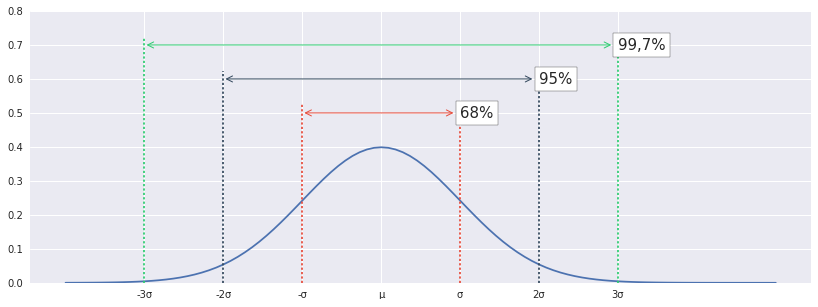

In [8]:
norm_rv = stats.norm(loc=0, scale = 1) #Вот у меня нормально распределенная величина
sample_norm = norm_rv.rvs(size=10000)
fig_rule = plt.figure(figsize=(14, 5))
ax = fig_rule.add_subplot(111)
x = np.linspace(-4,5,100)
pdf = norm_rv.pdf(x)
xticks = [-3, -2, -1, 0, 1, 2, 3]
xticks_s = ['-3σ', '-2σ', '-σ', 'μ', 'σ', '2σ', '3σ']
plt.xticks(xticks, xticks_s)
plt.ylim(0, 0.8)
plt.plot(x, pdf)
for i in [-3, 3]: plt.axvline(i, ls='dotted', c='#2ecc71', ymax=0.9)
for i in [-2, 2]: plt.axvline(i, ls='dotted', c="#34495e", ymax=0.78)
for i in [-1, 1]: plt.axvline(i, ls='dotted', c="#e74c3c", ymax=0.66)
ax.annotate('68%', xy=(-1, 0.5), \
            xytext=(1, 0.5), xycoords='data', 
            fontsize=15, ha='left', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='<->, head_length=0.4,head_width=0.2', lw=1.0, color="#e74c3c"))
ax.annotate('95%', xy=(-2, 0.6), \
            xytext=(2, 0.6), xycoords='data', 
            fontsize=15, ha='left', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='<->, head_length=0.4,head_width=0.2', lw=1.0, color="#34495e"))
ax.annotate('99,7%', xy=(-3, 0.7), \
            xytext=(3, 0.7), xycoords='data', 
            fontsize=15, ha='left', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='<->, head_length=0.4,head_width=0.2', lw=1.0, color='#2ecc71'))
plt.show()

Итак, для описания нормального распределения удобно указать среднее арифметическое и стандартное отклонение. Но для описания распределений, которые не похожи на нормальное, применять стандартное отклонение нельзя, ведь оно не отражает асимметрию. Для этого можно использовать квартили.  

Как вы помните, если взять выборку и выстроить ее по возрастанию (как вы помните, это называется вариационным рядом), а потом посмотреть, что находится посередине, то вы найдете медиану. <br> 
Если взять левую половину и найти ее персональную медиану, вы найдете первый квартиль. <br>
Если взять правую половину и тоже найти ее медиану, вы найдете третий квартиль. <br>
Медиана, соответственно, является вторым квартилем.<br>
Иными словами, квартили &mdash; это значения, которые делят вариационный ряд на четыре части. Расстояние между первым и третьим квартилями называется интерквартильным размахом &mdash; это еще одна мера рассеяния. <br>
Помимо квартилей, есть еще и процентили, только они дробят вариационный ряд на сто кусков. Первый квартиль это то же самое, что 25-й процентиль, а третий квартиль это то же самое, что 75-й процентиль. 
Квартили и процентили это разновидности квантилей &mdash; значений, которые дробят вариационный ряд на некоторое количество частей. Но об обстальных знать не обязательно. 

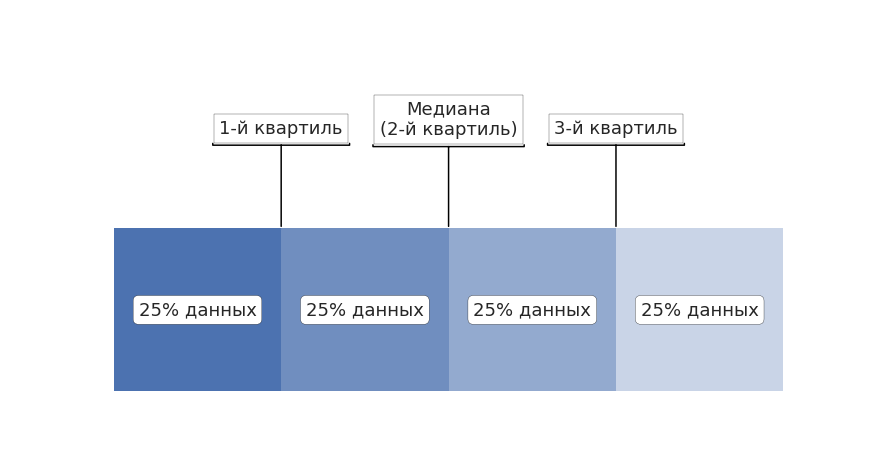

In [9]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
for p in [
    patches.Rectangle(
        (0.1, 0.1), 0.2, 0.3,
        alpha=None,
    ),
    patches.Rectangle(
        (0.3, 0.1), 0.2, 0.3,
        alpha=0.8, contains='lol'
    ),
    patches.Rectangle(
        (0.5, 0.1), 0.2, 0.3,
        alpha=0.6
    ),
    patches.Rectangle(
        (0.7, 0.1), 0.2, 0.3,
        alpha=0.3, label='lol'
    ),
]:
    ax.add_patch(p)
    
    
for x in range(0, 8, 2):
    ax.annotate('25% данных', xy=(0.2+x/10, 0.25), \
            xytext=(0.2+x/10, 0.25), xycoords='data', 
            fontsize=18, ha='center', va='center',
            bbox=dict(boxstyle='round', fc='white'))
ax.annotate('Медиана\n(2-й квартиль)', xy=(0.5, 0.4), \
        xytext=(0.5, 0.6), xycoords='data', 
            fontsize=18, ha='center', va='center',
            bbox=dict(boxstyle='square', pad=0.3, fc='white'),
            arrowprops=dict(arrowstyle=']-, widthA=4.2, lengthA=0.1', lw=1.5))
ax.annotate('1-й квартиль', xy=(0.3, 0.4), \
        xytext=(0.3, 0.6), xycoords='data', 
            fontsize=18, ha='center', va='top',
            bbox=dict(boxstyle='square', pad=0.3, fc='white'),
            arrowprops=dict(arrowstyle=']-, widthA=3.8, lengthA=0.1', lw=1.5))
ax.annotate('3-й квартиль', xy=(0.7, 0.4), \
        xytext=(0.7, 0.6), xycoords='data', 
            fontsize=18, ha='center', va='top',
            bbox=dict(boxstyle='square', pad=0.3, fc='white'),
            arrowprops=dict(arrowstyle=']-, widthA=3.8, lengthA=0.1', lw=1.5))
plt.ylim(0, 0.8)
plt.axis('off')
plt.show()

Давайте посмотрим, как квартили выглядят на скошенной гистограмме. Мы ожидаем, что первый и третий квартили будут на разном расстоянии от медианы, ведь именно эта фишка и заставляет нас их использовать. 

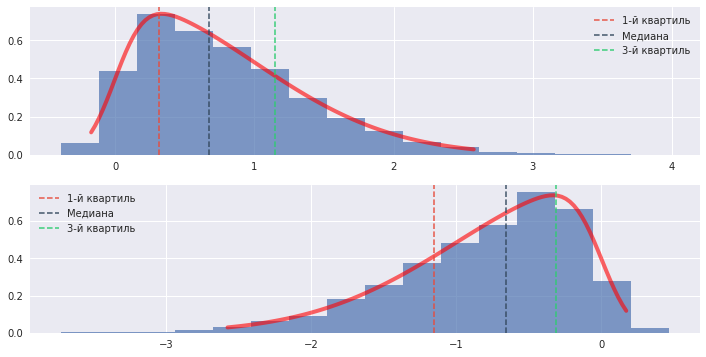

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
i = 6
sample = stats.skewnorm.rvs(i, size=10000)
x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
plt.hist(sample, 16, normed=True, alpha=0.7)
l1 = plt.axvline(np.percentile(sample, 25), c="#e74c3c", alpha=0.8, linestyle='dashed', label='1-й квартиль')
l2 = plt.axvline(np.percentile(sample, 50), c="#34495e", alpha=0.8, linestyle='dashed', label='Медиана')
l3 = plt.axvline(np.percentile(sample, 75), c="#2ecc71", alpha=0.8, linestyle='dashed', label='3-й квартиль')
plt.legend(handles=[l1, l2, l3])
plt.subplot(212)
i = -6
sample = stats.skewnorm.rvs(i, size=10000)
x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
plt.hist(sample, 16, normed=True, alpha=0.7)
l1 = plt.axvline(np.percentile(sample, 25), c="#e74c3c", alpha=0.8, linestyle='dashed', label='1-й квартиль')
l2 = plt.axvline(np.percentile(sample, 50), c="#34495e", alpha=0.8, linestyle='dashed', label='Медиана')
l3 = plt.axvline(np.percentile(sample, 75), c="#2ecc71", alpha=0.8, linestyle='dashed', label='3-й квартиль')
plt.legend(handles=[l1, l2, l3])
plt.show()

Смотрите, в первом случае правый склон гистограммы более пологий, и третий квартиль дальше от медианы, чем первый. Во втором случае первый квартиль дальше от медианы, чем первый, и у гистограммы более пологий левый склон. 

#### Ящик с усами

Есть один наигоднейший график, очень удобный для того, чтобы быстро оценить параметры выборки и сравнить их для нескольких выборок. Называется он ящиком с усами, или диаграммой размаха, или ящичковой диаграммой Тьюки. <br>
Выглядят ящики с усами вот так:

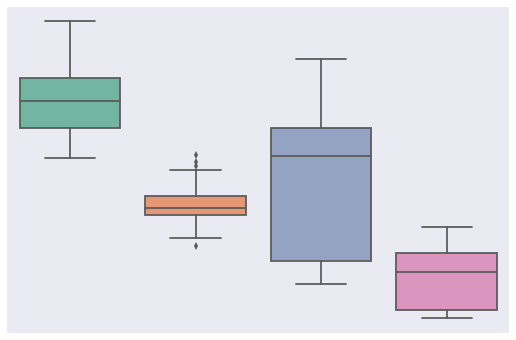

In [11]:
plt.figure(figsize=(9, 6))
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="v", palette="Set2")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

Ориентированы ящики могут быть как горизонтально, так и вертикально, на усмотрение исследователя. Суть их при этом не меняется. 

Устроены эти диаграммы довольно незатейливо. Границы самого ящика показывают первый и третий квартили, линия в центре &mdash; медиана. Максимальная длина каждого уса &mdash; полтора интерквартильных размаха. Если данные отстоят в меньшую сторону от первого квартиля или в большую от третьего на расстояние более полутора интерквартильных размахов (расстояние между 1-м и 3-м квартилями), то эти данные считаются выбросами и изображаются в виде точек. А если, например, единица наблюдения с наименьшим значением отстоит от первого квартиля только на половину интерквартильного размаха, то ус закончится на этой единице наблюдения (сравните оранжевый ящик на рисунке сверху и синий рядом с ним; длина усов оранжевого ящика максимальна &mdash; полтора интерквартильных размаха, а у синего ящика меньше, потому что данные так далеко не распростираются). <br>

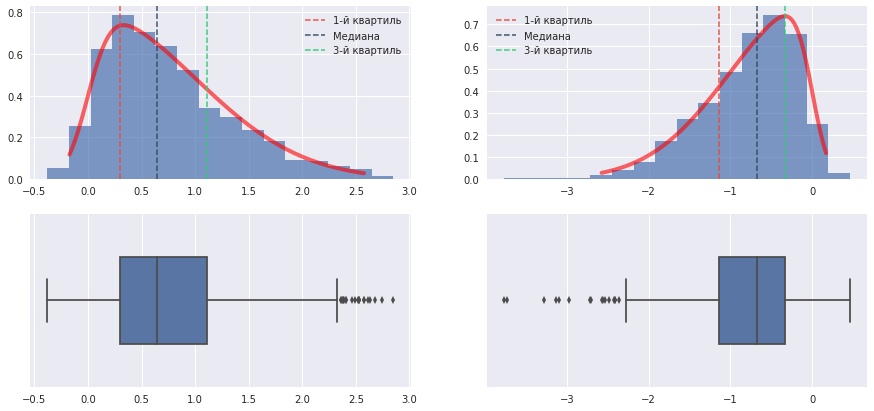

In [12]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
i = 6
sample = stats.skewnorm.rvs(i, size=1000)
x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
plt.hist(sample, 16, normed=True, alpha=0.7)
l1 = plt.axvline(np.percentile(sample, 25), c="#e74c3c", alpha=0.8, linestyle='dashed', label='1-й квартиль')
l2 = plt.axvline(np.percentile(sample, 50), c="#34495e", alpha=0.8, linestyle='dashed', label='Медиана')
l3 = plt.axvline(np.percentile(sample, 75), c="#2ecc71", alpha=0.8, linestyle='dashed', label='3-й квартиль')
plt.legend(handles=[l1, l2, l3])
plt.subplot(223)
sns.boxplot(sample, width=0.5)
plt.subplot(222)
i = -6
sample = stats.skewnorm.rvs(i, size=1000)
x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
plt.hist(sample, 16, normed=True, alpha=0.7)
l1 = plt.axvline(np.percentile(sample, 25), c="#e74c3c", alpha=0.8, linestyle='dashed', label='1-й квартиль')
l2 = plt.axvline(np.percentile(sample, 50), c="#34495e", alpha=0.8, linestyle='dashed', label='Медиана')
l3 = plt.axvline(np.percentile(sample, 75), c="#2ecc71", alpha=0.8, linestyle='dashed', label='3-й квартиль')
plt.legend(handles=[l1, l2, l3])
plt.subplot(224)
sns.boxplot(sample, width=0.5)
plt.show()

Важно помнить, что не каждую выборку можно описать с помощью перечисленных показателей или отразить ящичковой диаграммой. Хороший тому пример &mdash; бимодальные распределения. Смотрите на картинку. 

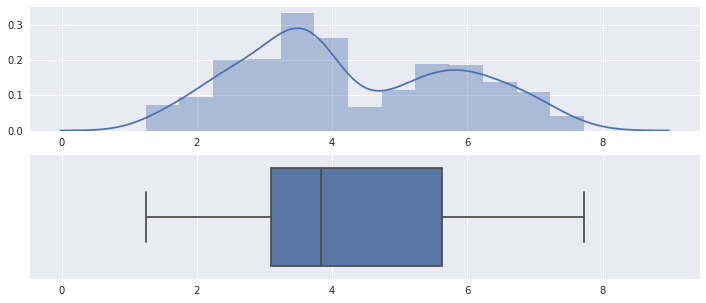

In [13]:
def bimodal( low1, high1, mode1, low2, high2, mode2 ):
    toss = np.random.choice( (1, 2) )
    if toss == 1:
        return np.random.triangular( low1, high1, mode1 ) 
    else:
        return np.random.triangular( low2, high2, mode2 )
a = []
for x in range(1000):
    a.append(bimodal(1, 4, 4, 3, 6, 8))
fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(211)
sns.distplot(a)
ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(a)
plt.show()

В подобных случаях разумным выходом будет просто показать гистограмму. 

#### Пример описания выборки

Давайте для примера опишем мужчин и женщин из таблицы Гальтона, о которой мы говорили при обсуждении гистограмм. 

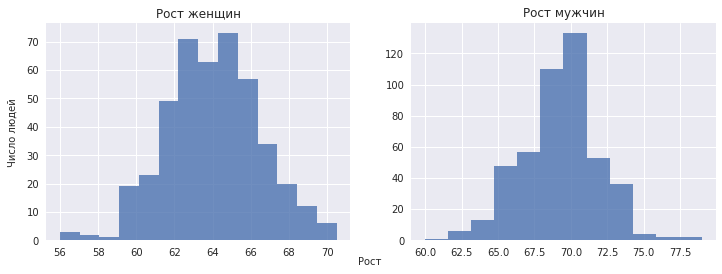

In [14]:
fig = plt.figure(figsize=(12, 4))
fig.text(0.5, 0.04, "Рост", ha='center')
fig.text(0.08, 0.5, "Число людей", va='center', rotation='vertical')
ax1 = plt.subplot(121)
galton[galton.Gender=='F'].Height.hist(bins=14, alpha=0.8)
plt.title('Рост женщин')

ax2 = plt.subplot(122)
galton[galton.Gender=='M'].Height.hist(bins=12, alpha=0.8)
plt.title('Рост мужчин')

plt.show()

Гистограмма роста женщин достаточно похожа на нормальное распределение, так что для иллюстрации опишем первую группу с помощью среднего арифметического и стандартного отклонения. Вторую  группу опишем с помощью медианы и квартилей. 

In [15]:
df = pd.DataFrame(columns=['F', 'M'], index=galton[galton.Gender=='F'].describe().index)
df['F']= galton[galton.Gender=='F'].describe().Height
df['M']= galton[galton.Gender=='M'].describe().Height
df.ix[1:]

,F,M
mean,64.110162,69.228817
std,2.370320,2.631594
min,56.000000,60.000000
25%,62.500000,67.500000
50%,64.000000,69.200000
75%,65.500000,71.000000
max,70.500000,79.000000


_Рост испытуемых женского пола варьирует в пределах от 56 до  70 дюймов, среднее арифметическое (стандартное отклонение) составляет 64.1 дюйма (2.4 дюйма). <br>
Рост испытуемых мужского пола варьирует в пределах от 60 до 79 дюймов с медианой (интерквартильной широтой), равной 69.2 дюйма (от 67.5 до 71 дюйма)_

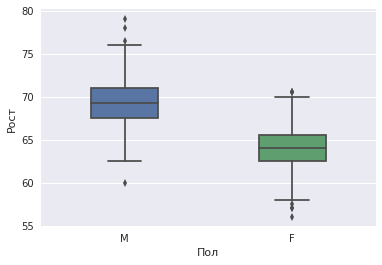

In [16]:
sns.boxplot(x=galton.Gender, y=galton.Height, data=galton, width=0.4)
plt.ylabel('Рост')
plt.xlabel('Пол')
plt.show()

Многие исследователи, чтобы обозначить среднее арифметическое и стандартное отклонение, пишут так: 64.1±2.4, но делать этого не стоит, потому что при таком оформлении возникает путаница между стандартным отклонением и доверительными интервалами (о доверительных интервалах скоро тоже поговорим). Лучше вообще не используйте символ "±". 

### Z-оценка

Встречаются как-то раз серб и вьетнамец. Рост серба 194 см, и у себя на родине он считается весьма высоким. Рост вьетнамца 174 см, и у себя на родине он тоже считается весьма высоким. Кто выше: серб среди сербов или вьетнамец среди вьетнамцев?

В Сербии средний рост мужчины 182 см. Так что рост нашего сербского господина на 12 см выше среднего. <br>
Во Вьетнаме средний рост мужчины 162 см. Так что рост нашего вьетнамского господина тоже на 12 см выше среднего. 

Стандартное отклонение для въетнамцев &mdash; 5,39 см, а для сербов &mdash; 6,74 см (посчитаны по огромным выборкам, так что хорошо аппроксимируют среднеквадратические отклонения). Давайте посмотрим на график. 

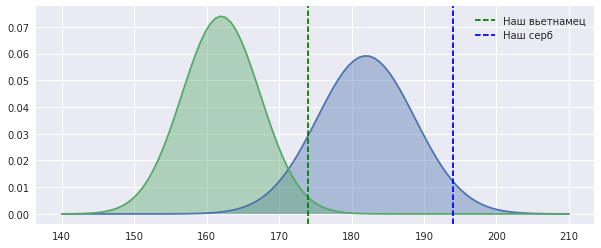

In [17]:
plt.figure(figsize=(10, 4))
norm_rv1 = stats.norm(loc=182, scale = 6.74)
norm_rv2 = stats.norm(loc=162, scale = 5.39)
x = np.linspace(140,210,100)
pdf1 = norm_rv1.pdf(x)
y = np.linspace(140,210,100)
pdf2 = norm_rv2.pdf(x)
lol = plt.plot(x,pdf1)
plt.fill_between(y1=pdf1, x=x, alpha=0.4)
plt.plot(y,pdf2)
plt.fill_between(y1=pdf2, x=x, alpha=0.4)
l1=plt.axvline(174, color='g', ls='dashed', label='Наш вьетнамец')
l2=plt.axvline(194, color='b', ls='dashed', label='Наш серб')
plt.legend(handles=[l1, l2])
plt.show()

Кажется, вьетнамец победил, он находится ближе к правому краю колокола, чем серб. Как в этом убедиться? <br>
Можно посчитать, на сколько стандартных отклонений рост серба и рост въетнамца отличаются от средних значений. Это самое количество стандартных отклонений называется z-оценкой и вычисляется по такой формуле: <br>
$z=\frac{x-\mu}{\sigma}$ <br>
То есть все, что надо сделать в случае с вьетнамцем &mdash; это вычесть 162 из 174 и поделить результат на 5,39. 

In [18]:
viet = (174-162)/5.39
serb = (194-182)/6.74

Итак, рост вьетнамца отклоняется на 2,23 стандартного отклонения от среднего, а рост серба &mdash; на 1,78 стандартного отклонения от среднего, то есть вьетнамец у себя на родине воспринимается более высоким, чем серб у себя. <br>
Таким образом можно стандартизировать любую нормально распределенную величину. По сути, мы наносим ее на график нормального распределения со средним, равным нулю и стандартым отклонением, равным единице. 

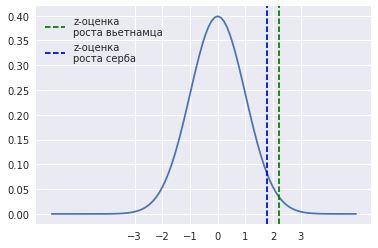

In [19]:
x = np.linspace(-6,5,100)
pdf = norm_rv.pdf(x)
xticks = [-3, -2, -1, 0, 1, 2, 3]
plt.xticks(xticks)
plt.plot(x, pdf)
l1=plt.axvline(viet, color='g', ls='dashed', label='z-оценка\nроста вьетнамца')
l2=plt.axvline(serb, color='b', ls='dashed', label='z-оценка\nроста серба')
plt.legend(handles=[l1, l2])
plt.show()

Такое нормальное распределение со средним, равным 0, и среднеквадратическим отклонением, равным 1, называется стандартным нормальным распределением, или z-распределением. 

У него есть одна любопытная и важная особенность. Зная z-оценку единицы наблюдения, мы можем также узнать, какой процент наблюдений превосходит значение этой единицы наблюдения. То есть мы можем прямо сейчас оценить, какая доля въетнамцев выше или ниже ростом, чем наш въетнамец. Для этого существует специальная таблица z-значений. 

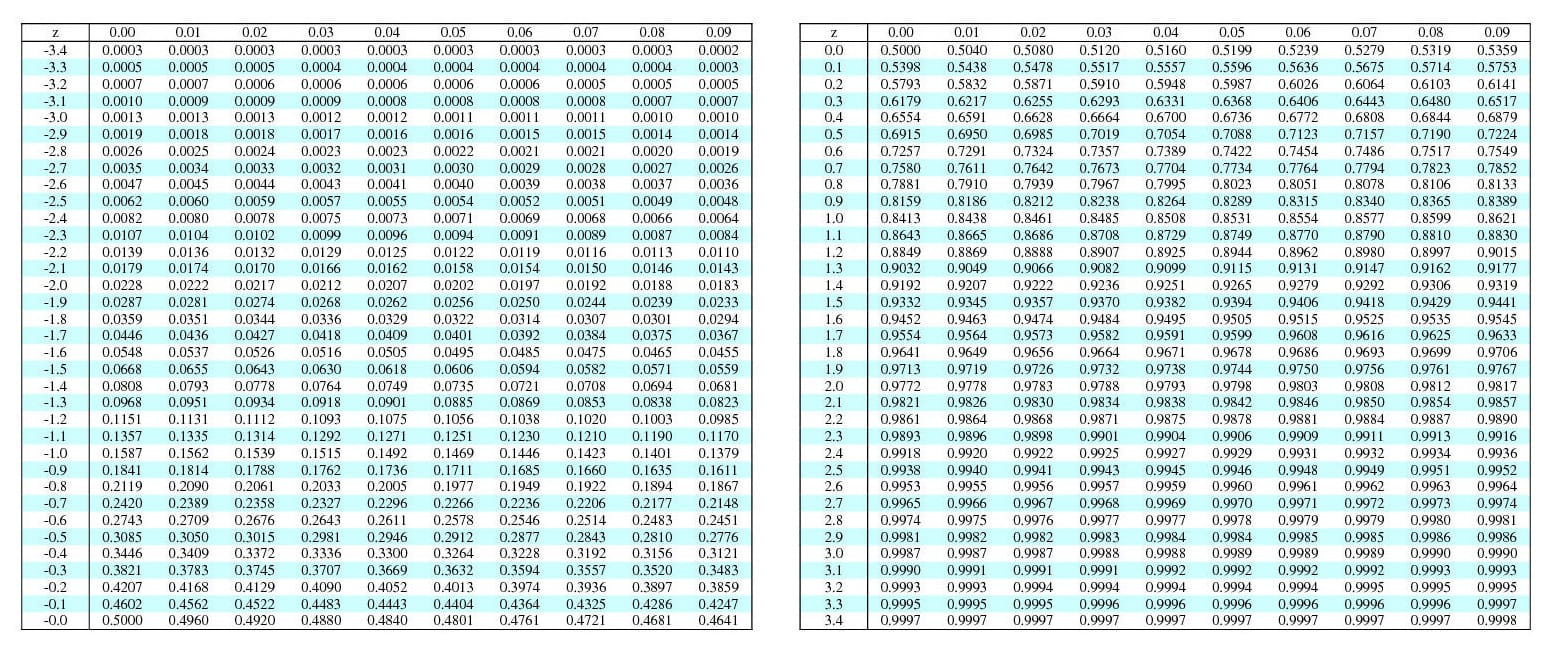

In [20]:
from IPython.display import Image
i = Image("z-table-min.jpg", width=1000)
i
#https://statistics.laerd.com/statistical-guides/img/normal-table-large.png

Z-оценка роста нашего вьетнамского приятеля составила 2,23 (с округлением до второго знака после запятой). В вертикальном столбце под буквой z находим 2,2, а в горизонтальном 0,03 (потому что 2,2 + 0,03 = 2,23), на пересечении стоит 0,9871. Это означает, что он выше 98,7% единиц наблюдения. 

Для вычисления z-значения необязательно использовать таблицу, можно получить более точную оценку с использованием специальных инструментов для работы с данными (это не обязательно должны быть R, SPSS или что-то подобное, можно поставить превосходное приложение "Probability Distrubutions" на телефон).

Зная про z-оценку, нетрудно догадаться, откудо взялось правило 68-95-99,7. Давайте посмотрим по таблице, какая доля единиц наблюдения лежит в интервале от -1 до 1. <br>
Левее z=1 лежит 84,13% единиц наблюдения, левее z=-1 лежит 15,87% единиц наблюдения. Между ними, соответственно, 84,13 - 15,87 = 68,26%. <br>
Можете проверить для 95 и 99,7, ну или попробовать для любых других точек. 

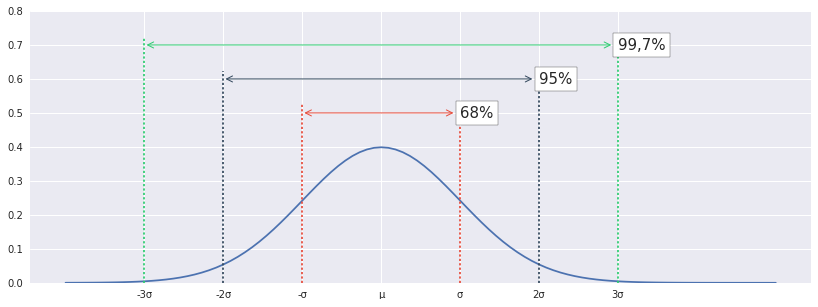

In [21]:
#Этот график я уже строил выше, так что не буду копировать тонну кода и просто перетащу сам график.
fig_rule

Подведу итог. Z-оценка &mdash; это количество стандартных отклонений, на которое единица наблюдения отклоняется от среднего арифметического. С помощью таблицы z-оценок можно определиь, какая доля единиц наблюдения лежит выше или ниже произвольного значения. Применима z-оценка только для нормально распределенных величин. 

### Центральная предельная теорема

Представьте: у меня есть две генеральные совокупности по миллиону объектов в каждой. В одной величина распределена нормально, в другой распределение скошенное. 

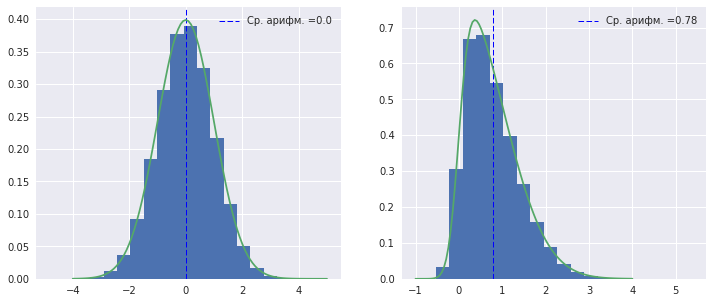

In [22]:
norm = norm_rv.rvs(size=1000000)
skewed = stats.skewnorm.rvs(5, size=1000000)
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
plt.hist(norm, normed=True, bins = 20)
x = np.linspace(-4,5,100)
pdf = norm_rv.pdf(x)
plt.axvline(norm.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Ср. арифм. ='+str(round(norm.mean(), 2))])
plt.plot(x, pdf)

ax = fig.add_subplot(122)
plt.hist(skewed, normed=True, bins = 20)
y = np.linspace(-1,4,100)
pdf = stats.skewnorm(5).pdf(y)
plt.axvline(skewed.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Ср. арифм. ='+str(round(skewed.mean(), 2))])
plt.plot(y, pdf)

plt.show()

Что будет, если я извлеку много-много выборок из генеральной совокупности и посчитаю для каждой из этих выборок среднее арифметическое? Видимо, получится выборка из средних арифметических. Но как будет выглядеть гистограмма такой выборки? 

Давайте проделаем этот трюк для каждой из наших генеральных совокупностей. Вытащим из каждой по десять тысяч выборок по 3 единицы наблюдения, посчитаем средние арифметические для всех них и получим две гистограммы, показывающие распределения средних арифметических. 

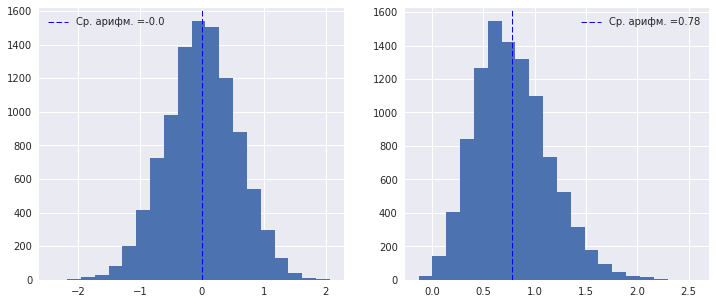

In [23]:
mean_list_norm = np.array([np.mean(np.random.choice(norm, 3)) for i in range(10000)])
mean_list_skewed = np.array([np.mean(np.random.choice(skewed, 3)) for i in range(10000)])

fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.axvline(mean_list_norm.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Ср. арифм. ='+str(round(mean_list_norm.mean(), 2))])
plt.hist(mean_list_norm, bins = 20)

fig.add_subplot(122)
plt.hist(mean_list_skewed, bins = 20)
plt.axvline(mean_list_skewed.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Ср. арифм. ='+str(round(mean_list_skewed.mean(), 2))])
plt.show()

Как видите, распределения выборочных средних похожи на распределения величин в генеральных совокупностях (хотя правое скошено несколько меньше). Средние арифметические примерно совпадают с истинными средними арифметическими, что неудивительно. Бросается в глаза, что эти гистограммы получились уже, чем гистограммы генеральных совокупностей (обратите внимание на ось $x$). Это тоже неудивительно, ведь, понятное дело, выборочные средние не так сильно варьируют, как единицы наблюдения во всей генеральной совокупности. <br>
Давайте провернем этот трюк еще раз, но теперь будет извлекать выборки объемом 15.

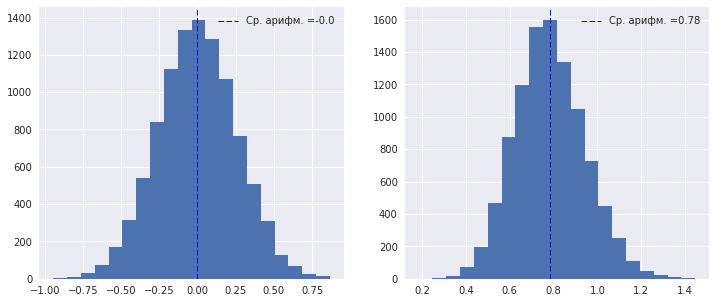

In [24]:
mean_list_norm = np.array([np.mean(np.random.choice(norm, 15)) for i in range(10000)])
mean_list_skewed = np.array([np.mean(np.random.choice(skewed, 15)) for i in range(10000)])

fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.axvline(mean_list_norm.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Ср. арифм. ='+str(round(mean_list_norm.mean(), 2))])
plt.hist(mean_list_norm, bins = 20)

fig.add_subplot(122)
plt.hist(mean_list_skewed, bins = 20)
plt.axvline(mean_list_skewed.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Ср. арифм. ='+str(round(mean_list_skewed.mean(), 2))])
plt.show()

Гистограммы стали еще уже, а правая еще менее скошенной. Давайте еще раз. Извлечем из генеральных совокупностей по 10000 выборок, но теперь объемом 30. 

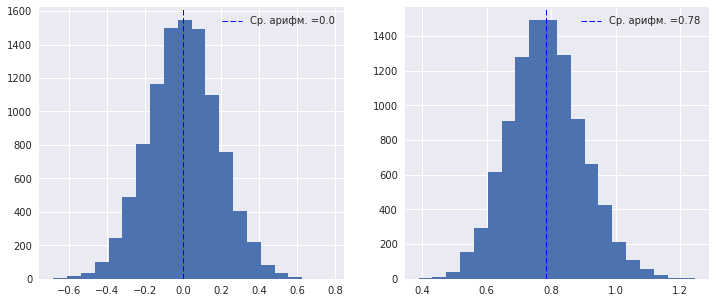

In [25]:
mean_list_norm = np.array([np.mean(np.random.choice(norm, 30)) for i in range(10000)])
mean_list_skewed = np.array([np.mean(np.random.choice(skewed, 30)) for i in range(10000)])

fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.axvline(mean_list_norm.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Ср. арифм. ='+str(round(mean_list_norm.mean(), 2))])
plt.hist(mean_list_norm, bins = 20)

fig.add_subplot(122)
plt.hist(mean_list_skewed, bins = 20)
plt.axvline(mean_list_skewed.mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Ср. арифм. ='+str(round(mean_list_skewed.mean(), 2))])
plt.show()

На вид две гистограммы нормально распределенной величины. Кстати, смотрите, они стали еще уже. Это абсолютно логично: чем больше размер выборки, тем более точную оценку среднего она может нам предоставить. Маленькие выборки хуже отражают параметры генеральной совокупности, чем большие. <br>
И, как видите, чем больше выборка, тем сильнее распределение выборочных средних похоже на нормальное, и тем меньше будет рассеяние значений вокруг среднего (выше точность оценки среднего). Стало быть, чем больше объем выборки, тем меньше стандартное отклонение в выборке выборочных средних :)

Теперь кое-что очень важное. <br>
Вот это стандартное отклонение в выборке, составленной из выборочных средних, называется стандартной ошибкой среднего. Приятная новость состоит в том, что для его определения не надо получать кучу выборок, есть простая маленькая формула:<br>
$SD_\overline{x} = \frac{\sigma}{\sqrt{n}}$ &mdash; истинная стандартная ошибка среднего.

Но, как вы понимаете, для оценки истинной стандартной ошибки среднего надо знать среднеквадратическое отклонение в генеральной совокупности, а это редкая роскошь, которой мы обычно не обладаем. Так что стандартную ошибку среднего мы оцениваем по выборочному стандартному отклонению:<br>
$SE_\overline{x} = \frac{s}{\sqrt{n}}$

Некоторые исследователи используют стандартную ошибку среднего для описания выборки вместо стандартного отклонения (первая всегда меньше второй, поэтому иногда возникает такой соблазн). Этого делать не стоит, так как этот показатель нужен для оценки среднего в генеральной совокупности, он не является описательной статистикой. 

Одной только стандартной ошибки для оценки среднего недостаточно. Но она позволит нам вычислять доверительные интервалы и проверять гипотезы, об этом мы сейчас поговорим. 

### Проверка гипотез

#### Концепция

В разделе про z-оценку мы говорили о вьетнамце и сербе, оба они были весьма высокими. На самом деле там был был и третий человек, малайзиец. "Вообще-то я тоже серб," &mdash; сказал он. Однако это было довольно подозрительно, ведь, помимо всего прочего, рост малайзийца был 168 см. <br>
Впрочем, хорошо, давайте на секунду предположим, что перед нами и правда серб. Какова вероятность встретить столь низкого (или еще более низкого) серба? На этот вопрос ответить нетрудно, нужно лишь узнать, насколько характерен такой рост для сербских мужчин. Если вероятность встретить такого или более низкого человека менее 5% (то есть если имеющееся значение отличается от среднего очень сильно), будем считать, что подозреваемый, скорее всего, пытается нас обмануть. <br>
Иными словами, надо посмотреть, какая доля генеральной совокупности попадает в этот интервал:

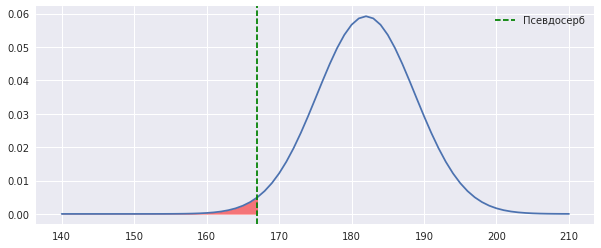

In [26]:
plt.figure(figsize=(10, 4))
norm_rv = stats.norm(loc=182, scale = 6.74)
x = np.linspace(140,210,71)
y = norm_rv.pdf(x)
lol = plt.plot(x,y)
l1=plt.axvline(167, color='g', ls='dashed', label='Псевдосерб')
plt.fill_between(x[:np.where(x==168)[0][0]], \
                 y[:np.where(x==168)[0][0]], color='r', alpha=0.5, label='1.3% сербов')
plt.legend(handles=[l1])
plt.show()

Сначала надо посчитать z-оценку (количество стандартных отклонений, на которое интересующее нас значение отклоняется от популяционного среднего). Как мы помним, средний рост сербского мужчины равен 182 см, а стандартное отклонение 6,74 см. 

Считаем z-оценку: <br>
$z=\frac{x-\mu}{\sigma} = \frac{167-182}{6,74} = -2.23$

Итак, рост странного незнакомца отстоит от среднего роста серба на -2.23 стандартных отклонения. Посмотрим по таблице z-значений, какая доля сербов имеет такой же или еще меньший рост. 

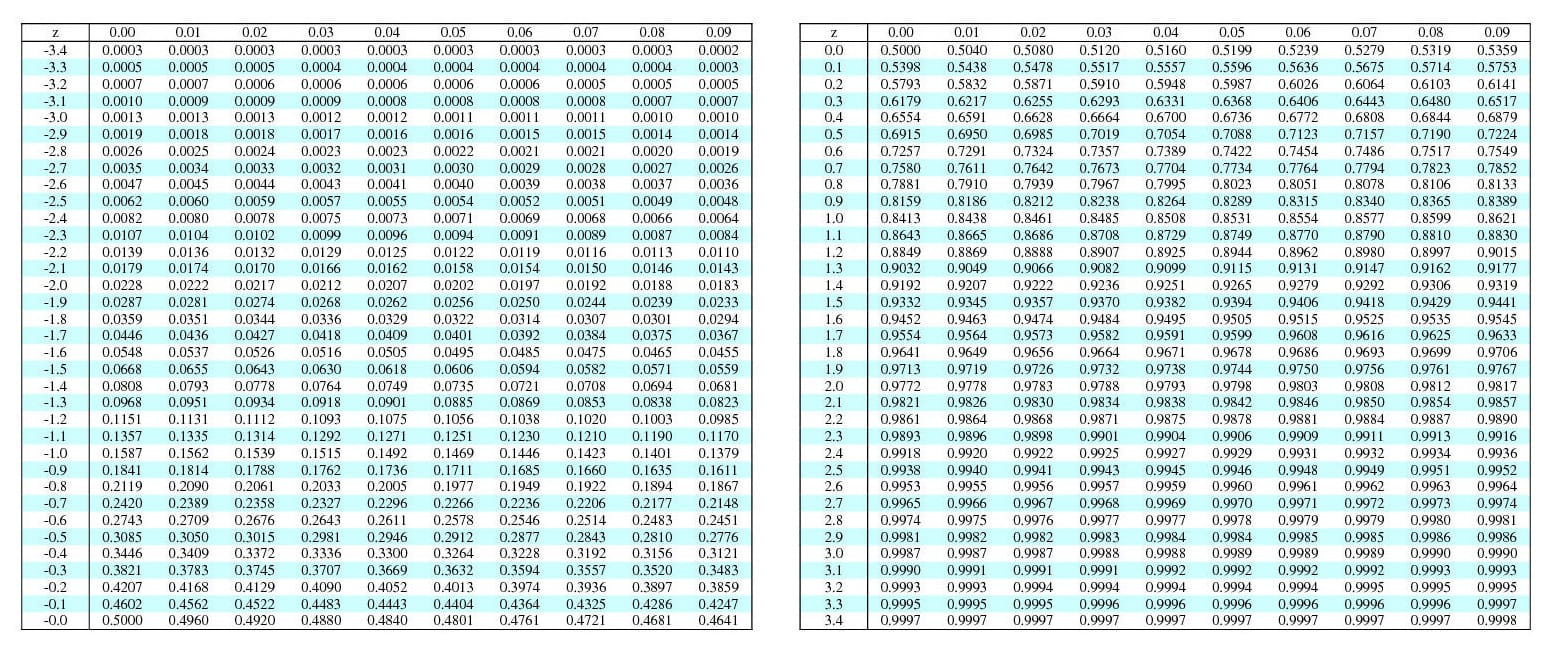

In [28]:
#Вставляю таблицу, которую загрузил в разделе про z-оценки
i

Итак, 1,3% сербов имеют такой или еще более низкий рост. Всего лишь 1,3% &mdash; не такое уж частое явление. Иными словами, у нас есть серьезный повод усомниться, что перед нами серб. 

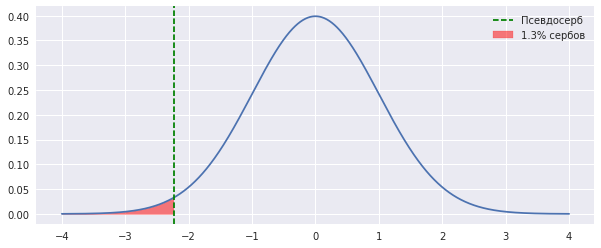

In [29]:
plt.figure(figsize=(10, 4))
x = np.linspace(-4,4,801, endpoint=True)
norm_rv = stats.norm(loc=0, scale = 1)
y1 = norm_rv.pdf(x)
plt.plot(x,y1)
l1=plt.axvline(-2.23, color='g', ls='dashed', label='Псевдосерб')
fill=plt.fill_between(x[:np.where(x==-2.23)[0][0]], \
                 y1[:np.where(x==-2.23)[0][0]], color='r', alpha=0.5, label='1.3% сербов')
plt.legend(handles=[l1, fill])
plt.show()

То, что мы сейчас сделали, называется проверкой гипотезы. Это невероятно важная, если не самая важная, концепция в доказательной медицине. Когда мы сравниваем уровень гликозилированного гемоглобина у диабетиков и здоровых людей и считаем уровень статистической значимости, мы проверяем гипотезу. Когда мы сравниваем доли умерших за 10 лет в группе больных гипертонической болезнью I стадии и в контрольной группе, мы тоже проверяем гипотезу. Мы все время этим занимаемся. 

В ходе проверки гипотезы мы проходим несколько этапов: <br>
* Формулируем нулевую гипотезу ($H_0$). Это обычно путь наименьшего сопротивления, самое унылое и серое утверждение: об отсутствии различия, отсутствии взаимосвязи, отсутствии изменений. В нашем случае мы предполагаем, что рост незнакомца относится к генеральной совокупности ростов сербов. 
* Формулируем альтернативную гипотезу ($H_1$). Это уже более интересная гипотеза: есть различие, есть взаимосвязь, есть изменения, есть что-то занятное. Ну или как в нашем случае: наш субъект слишком низкий, чтобы быть сербом.
* Решаем, что для нас такое "слишком низкий", "слишком большое различие" и т.п. То есть определяемся, в каком случае отвергнем нулевую гипотезу в пользу альтернативной. В нашем примере мы отвергаем $H_0$, если такие или еще более низкие сербы встречаются реже, чем в 5% случаев (то есть его слова неправдоподобны, и такой рост является редкостью). Выбранная нами вероятность называется уровнем $\alpha$. В медицине, как правило, устанавливают пороговый уровень статистической значимости $\alpha$ = 0.05 (так мы ограничиваем вероятность ошибочно отвергнуть нулевую гипотезу; по исходному замыслу эта ошибка должна встречаться не чаще, чем в каждом 20 исследовании, &mdash; на практике, конечно, это не так). Иными словами, величину считаем статистически значимой, если мала вероятность получить такое или еще более крайнее ее значение (а что мы понимаем под "малой вероятностью" &mdash; как раз и есть $\alpha$).
* Применяем статистический тест: расчитываем некий показатель, который подчиняется своему закону распределения, в нашем случае это z-оценка, подчиняющаяся нормальному закону. 
* Получаем уровень статистической значимости &mdash; p-значение. Если он меньше, чем выбранный нами уровень $\alpha$ (то есть вероятность получить такое значение меньше выбранного нами уровня), то мы отвергаем нулевую гипотезу. Если больше или равен, то мы не можем отвергнуть нулевую гипотезу. Потому что вы видите, что полученные вами данные плохо с ней уживаются.

p-значение это довольно мозговыносящая вещь. Прочитайте как следует: оно показывает вероятность получения наблюдаемых нами или еще более экстремальных результатов, если нулевая гипотеза справедлива. Еще раз, p-значение это ответ на вопрос: "Ну ок, если нулевая гипотеза верна и ничего интересного тут нет, то какая вероятность при этом получить такой результат, который мы получили, или даже еще более выдающийся?". p-значение &mdash; показатель того, насколько хорошо нулевая гипотеза уживается с полученными вами данными. <br>
По сути, это статистический вариант доказательства от противного: предположим, больные раком мочевого пузыря живут в среднем столько же, сколько здоровые люди; тогда полученная нами разница в средней продолжительности жизни людей в соответствующих выборках очень подозрительна: слишком мала вероятность получить такой результат, если разницы и правда нет, так что все, отвергаем нулевую гипотезу, больные раком мочевого пузыря живут в среднем не столько же, сколько здоровые люди. В моем примере мы думали так: "Если нулевая гипотеза верна и незнакомец говорит правду, то какова вообще вероятность натолкнуться на такого или еще более низкого серба? 0,013, или 1.3%. Маловато!".<br>
Стало быть, в нашем случае p<0,05, мы отвергаем нулевую гипотезу. 

#### Одновыборочный z-тест

Пришло время объединить z-оценку с центральной предельной теоремой. <br>
Как вы помните, z-оценка в единицах стандартного отклонения указывает, насколько далеко отстоит величина от среднего. <br>
А центральная предельная теорема говорит, что для генеральной совокупности распределение ее выборочных средних будет иметь такое же среднее, а стандартное отклонение будет меньше (и будет называться стандартной ошибкой среднего, $\frac{\sigma}{\sqrt{n}}$), ну и самое главное &mdash; с увеличением размера выборок распределение выборочных средних будет все ближе к нормальному. Вот картинка для простоты:

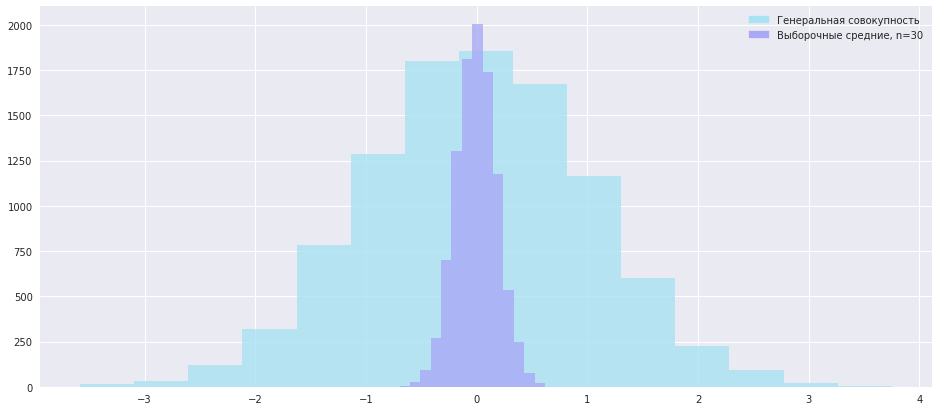

In [30]:
scale = 1
norm_rv1 = stats.norm(loc=0, scale = 1)
norm_rv2 = stats.norm(loc=0, scale = scale/(30**0.5))
sample_norm1 = norm_rv1.rvs(size=10000)
sample_norm2 = norm_rv2.rvs(size=10000)
fig = plt.figure(figsize=(16, 7))
p = plt.hist(sample_norm1, 15, alpha=0.8, color='#A9E2F3')
sd = plt.hist(sample_norm2, 15, alpha=0.8, color='#A9A9F5')

import matplotlib.patches as mpatches
p = mpatches.Patch(color='#A9E2F3', label='Генеральная совокупность')
sd = mpatches.Patch(color='#A9A9F5', label='Выборочные средние, n=30')
plt.legend(handles=(p, sd))
plt.show()

Теперь давайте вообразим, что мы проводим опыт. Предположим, для эксперимента мы используем крыс из определенной линии, для которой известна средняя масса тела &mdash; 400 грамм. Стандартное отклонение (посчитано по огромной выборке и хорошо аппроксимирует генеральное среднеквадратическое отклонение) составляет 18. <br>
Мы взяли 20 крысят и с раннего возраста накачивали их соматотропным гормоном. В итоге получили 20 взрослых крыс со средней массой тела 410. <br>
Много это или мало? Можно ли сказать, что инъекция гормона статистически значимо повысила массу тела крыс? <br>
Давайте проверять гипотезу. 

$H_0: \mu=\mu_0$ &mdash; мы предполагаем, что средняя масса тела в генеральной совокупности крыс, которые получили инъекцию гормона, не отличается от средней массы тела крыс, которые не участвовали ни в каких экспериментах. <br>
$H_1: \mu>\mu_0$ &mdash; альтернативная гипотеза: средняя масса тела крыс, которым делают инъекцию соматотропина, больше средней массы тела обычных крыс. <br>
Различия будем считать достоверными при уровне значимости меньше 0,05.

Как вы помните, z-оценку для одного объекта можно получить по такой форуле: $z=\frac{x-\mu}{\sigma}$. Мы рассматриваем этот объект как часть генеральной совокупности и оцениваем, где он находится в ее распределении. Но сейчас мы хотим оценить выборочное среднее. А значит, нам нужно распределение выборочных средних (для выборок такого объема, как наша, то есть 20 единиц наблюдения). Его параметры мы отлично себе представляем: среднее как в генеральной совокупности, 400 грамм, а стандартное отклонение равно $\frac{18}{\sqrt{20}}$ (оно же стандартная ошибка среднего). Вот теперь и посмотрим, как далеко отклоняется среднее по нашей выборке от среднего в распределении выборочных средних (да, звучит жестко). 

Формула, очевидно, будет почти такая же, только в знаменателе вместо $\sigma$ появится стандартная ошибка среднего, а вместо $x$ (значения одной единицы наблюдения) будет $\overline{x}$: <br>
$z=\frac{\overline{x}-\mu_0}{\sigma/\sqrt{n}} = \frac{410-400}{18/\sqrt{20}} = 2,48$

Смотрим в таблицу z-оценок: наше значение больше, чем 99,34% популяции. 

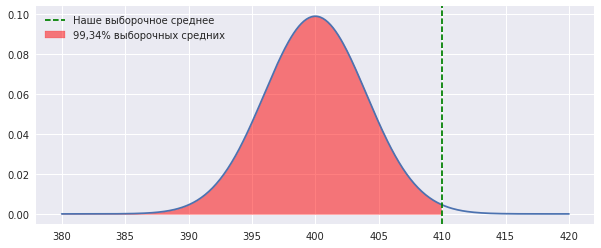

In [31]:
plt.figure(figsize=(10, 4))
norm_rv = stats.norm(loc=400, scale = 18/(20**0.5))
x = np.linspace(380,420,401)
y = norm_rv.pdf(x, )
plt.plot(x,y)
l1=plt.axvline(410, color='g', ls='dashed', label='Наше выборочное среднее')
fill=plt.fill_between(x[:np.where(x==410)[0][0]], \
                 y[:np.where(x==410)[0][0]], color='r', alpha=0.5, label='99,34% выборочных средних')
plt.legend(handles=[l1, fill])
plt.show()

Но тут нам нужно посмотреть не это, нас интересует правый хвост распределения &mdash; какая доля выборочных средних отклоняются от генерального среднего так же или еще более значительно. Это сделать легко: если слева 99,34%, то справа 100 - 99,34%, или 0.66%, то есть p=0.0066, что явно меньше установленного нами уровня $\alpha$.

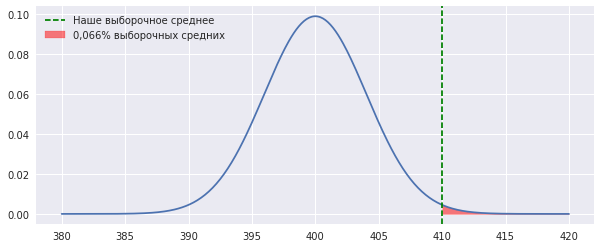

In [32]:
plt.figure(figsize=(10, 4))
norm_rv = stats.norm(loc=400, scale = 18/(20**0.5))
x = np.linspace(380,420,401)
y = norm_rv.pdf(x, )
plt.plot(x,y)
l1=plt.axvline(410, color='g', ls='dashed', label='Наше выборочное среднее')
fill=plt.fill_between(x[np.where(x==410)[0][0]:], \
                 y[np.where(x==410)[0][0]:], color='r', alpha=0.5, label='0,066% выборочных средних')
plt.legend(handles=[l1, fill])
plt.show()

Итак, вероятность получить такое же или еще более экстремальное значение при условии справедливости нулевой гипотезы &mdash; 0,0066, это очень мало. То есть наблюдаемые нами данные сильно противоречат нулевой гипотезе, и мы ее отвергаем. 

Тут надо заметить, что альтернативная гипотеза может быть не только в стиле "больше" или "меньше" &mdash; это, скорее, редкость. Обычно мы не знаем заранее, как повлияет вносимое нами различие, так что нужно использовать не одностороннюю, а двустороннюю альтернативу: <br>
$H_1: \mu\neq\mu_0$ &mdash; то есть смотреть в таком случае следует на оба хвоста. В нашем случае z-оценка составила 2,48, но при такой альтернативной гипотезе нужно учесть и хвост левее -2.48. Ведь там единицы наблюдения будут отклоняться столь же сильно или сильнее, просто в другую сторону. 

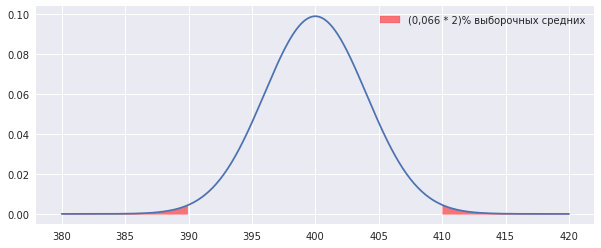

In [33]:
plt.figure(figsize=(10, 4))
norm_rv = stats.norm(loc=400, scale = 18/(20**0.5))
x = np.linspace(380,420,401)
y = norm_rv.pdf(x, )
plt.plot(x,y)
fill=plt.fill_between(x[np.where(x==410)[0][0]:], \
                 y[np.where(x==410)[0][0]:], color='r', alpha=0.5, label='(0,066 * 2)% выборочных средних')
plt.fill_between(x[:np.where(x==390)[0][0]], \
                 y[:np.where(x==390)[0][0]], color='r', alpha=0.5)
plt.legend(handles=[fill])
plt.show()

Хорошая новость состоит в том, что, раз уж распределение симметрично, лазить по таблице не нужно: меньше z=-2.48 столько же единиц наблюдения, сколько и больше z=2.48, то есть всего 0.0066 * 2 = 0,0132. <br>
Стало быть, двусторонний вариант альтернативной гипотезы мы также можем отвергнуть; средняя масса тела крыс, получавших инъекции соматотропина, статистически значимо отличается от популяционного среднего, p<0,05. 

##### Вкратце

Одновыборочный z-критерий используется, чтобы оценить значимость различий между предполагаемым популяционным средним $\mu_0$ и выборочным средним $\overline{x}$. 

Ограничения к применению критерия: 
* Мы должны знать генеральную дисперсию (или среднеквадратическое отклонение) или располагать ее оценкой с высокой точностью. Если этого нет, то стоит использовать t-статистику, о ней скоро поговорим. 
* Тест подходит для работы с нормально распределенными величинами. Если распределение немного отличается от нормального, но выборка большая (>30), центральная предельная теорема все равно дает нам возможность использовать тест (ведь нас интересует распределение выборочных средних). Но будьте осторожны, стройте вначале гистограмму, бывают очень сильно скошенные распределения. Если есть сомнения, лучше взять t-тест.

Статистика критерия вычисляется по формуле: <br>
$z=\frac{\overline{x}-\mu_0}{\sigma/\sqrt{n}}$ &mdash; результат пробиваем по таблице z-оценок и получаем p-value, которое затем нужно умножить на 2 (если альтернатива двусторонняя, $\neq$) или не умножать (если альтернатива односторонняя, то есть $>$ или $<$).

#### Одновыборочный t-тест.

In [34]:
#https://effectsizefaq.com/2010/05/31/i-always-get-confused-about-type-i-and-ii-errors-can-you-show-me-something-to-help-me-remember-the-difference/

In [35]:
%%javascript
//Этот блок нужен для построения оглавления
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>